In [8]:
from network import Network

In [9]:
net = Network("networks/test.dat")

Loading network from networks/test.dat
Network label = test


100%|██████████| 18/18 [00:00<00:00, 1010.34it/s]

PRIZMO variable detected: invt = 1d0 / Tgas
PRIZMO variable detected: t32 = Tgas / 3d2
KROME format detected: @format:R,R,P,P,rate
Variables found: ['av', 'crate', 'tgas']
Loaded 13 reactions
Sink:  N2+
Sink:  H2
generating ode...
All done!


In [10]:
# list some stuff
print([x.name for x in net.species])  # variable names
print([x.latex for x in net.species])  # latex names
print([x.mass for x in net.species])  # masses, g
print([x.charge for x in net.species]) # charges, e

print([x.get_verbatim() for x in net.reactions])  # reactionw names
print([x.get_latex() for x in net.reactions])  # latex names

print(net.reactions[0].get_verbatim())  # verbatim name of first reaction
print(net.reactions[0].serialized)

print(net.reactions[0].get_c())  # rate in C format of first reaction
print(net.reactions[0].get_f90())  # rate in Fortran 90 format of first reaction

print(net.reactions[0].is_same(net.reactions[0]))  # check if the first reaction is the same as itself
print(net.reactions[0].is_same(net.reactions[1]))  # check if the first reaction is the same as the second

net.reactions[0].rate  # rate of first reaction in symbolic form



['H+', 'e-', 'H', 'C', 'C+', 'CO+', 'CO', 'O', 'N2', 'N', 'N2+', 'H2']
['{\\rm H^{+}}', '{\\rm e^{-}}', '{\\rm H}', '{\\rm C}', '{\\rm C^{+}}', '{\\rm CO^{+}}', '{\\rm CO}', '{\\rm O}', '{\\rm N_{2}}', '{\\rm N}', '{\\rm N_{2}^{+}}', '{\\rm H_{2}}']
[1.673773e-24, 9.109383e-28, 1.673773e-24, 1.994473e-23, 1.994473e-23, 4.6512359999999996e-23, 4.6512359999999996e-23, 2.656763e-23, 4.651734e-23, 2.325867e-23, 4.651734e-23, 3.347546e-24]
[1, -1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
['H+ + e- -> H', 'H -> H+ + e-', 'C -> C+ + e-', 'C+ + e- -> C', 'CO+ + e- -> CO', 'C + O -> CO', 'CO -> C + O', 'CO -> CO+ + e-', 'N2 -> N + N', 'N + N -> N2', 'CO + N2+ -> N2 + CO+', 'H2 + e- -> H + H + e-', 'CO + N2+ -> N2 + CO+']
['${\\rm H^{+}} + {\\rm e^{-}}\\,\\to\\,{\\rm H}$', '${\\rm H}\\,\\to\\,{\\rm H^{+}} + {\\rm e^{-}}$', '${\\rm C}\\,\\to\\,{\\rm C^{+}} + {\\rm e^{-}}$', '${\\rm C^{+}} + {\\rm e^{-}}\\,\\to\\,{\\rm C}$', '${\\rm CO^{+}} + {\\rm e^{-}}\\,\\to\\,{\\rm CO}$', '${\\rm C} + {\\rm O}\\,\\to\\,

2.60224476150794e-10/tgas**0.75

In [11]:
net2 = Network("networks/test2.dat", label="very small network")

Loading network from networks/test2.dat
Network label = very small network


100%|██████████| 1/1 [00:00<00:00, 552.25it/s]

Variables found: ['tgas']
Loaded 1 reactions
Sink:  e-
Sink:  CO+
Source:  CO
generating ode...
All done!


In [12]:
net.compare_reactions(net2)  # compare two networks

Comparing networks "test" and "very small network"...
Found in "test" but not in "very small network": C+ + e- -> C
Found in "test" but not in "very small network": H+ + e- -> H
Found in "test" but not in "very small network": CO + N2+ -> N2 + CO+
Found in "test" but not in "very small network": CO -> CO+ + e-
Found in "test" but not in "very small network": CO -> C + O
Found in "test" but not in "very small network": C + O -> CO
Found in "test" but not in "very small network": C -> C+ + e-
Found in "test" but not in "very small network": H2 + e- -> H + H + e-
Found in "test" but not in "very small network": H -> H+ + e-
Found in "test" but not in "very small network": N2 -> N + N
Found in "test" but not in "very small network": N + N -> N2
Found 1 reactions in common
0 reactions missing in "test"
11 reactions missing in "very small network"


In [13]:
net.compare_species(net2)  # compare species in two networks

Comparing species in networks "test" and "very small network"...
Found 3 species in common: ['CO', 'CO+', 'e-']
Found 9 species in "test" but not in "very small network": ['C', 'C+', 'H', 'H+', 'H2', 'N', 'N2', 'N2+', 'O']
Found 0 species in "very small network" but not in "test": []


In [14]:
net = Network("networks/gas_reactions_kida.uva.2024.in")

Loading network from networks/gas_reactions_kida.uva.2024.in
Network label = gas_reactions_kida


 99%|█████████▊| 8156/8275 [00:09<00:00, 1057.89it/s]

100%|██████████| 8275/8275 [00:09<00:00, 829.85it/s] 


Variables found: ['av', 'crate', 'tgas']
Loaded 8275 reactions
Sink:  O3
Sink:  H2S3
Sink:  NH2CH2OH
Sink:  FeH
Sink:  MgH2
Sink:  C5H3
Sink:  C6H3
Sink:  C7H3
Sink:  C8H3
Sink:  C9H3
Sink:  C5H4
Sink:  C7H4
Sink:  C8H4
Sink:  C9H4
Sink:  HSO
Sink:  NHCHO
Sink:  HOCHN
Sink:  NH2CO
Sink:  HCOCO
Sink:  HCOCHO
Sink:  HOCO
generating ode...
All done!


1500.0*crate


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

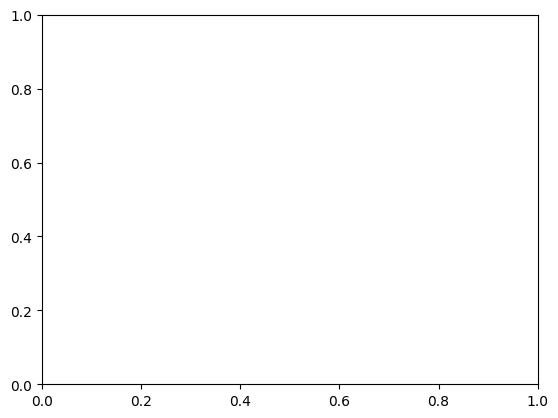

In [ ]:
print(net.reactions[1122].rate)  # verbatim name of first reaction in COthin network
net.reactions[1122].plot()